# DSBDAL Lab Assignment 1
Author: Shantanu Wable

Dataset: Global Superstore Dataset

Link: https://www.kaggle.com/datasets/fatihilhan/global-superstore-dataset

### Import required libraries

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import plotly.express as px
from  plotly.subplots  import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy import stats

### Checking for files in the CWD

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/global-superstore-dataset/superstore.csv


In [3]:
df = pd.read_csv('/kaggle/input/global-superstore-dataset/superstore.csv')

In [4]:
df.shape

(51290, 27)

In [5]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Category   City  Country  Customer.ID  Customer.Name  Discount  Market  \
0         False  False    False        False          False     False   False   
1         False  False    False        False          False     False   False   
2         False  False    False        False          False     False   False   
3         False  False    False        False          False     False   False   
4         False  False    False        False          False     False   False   
...         ...    ...      ...          ...            ...       ...     ...   
51285     False  False    False        False          False     False   False   
51286     False  False    False        False          False     False   False   
51287     False  False    False        False          False     False   False   
51288     False  False    False        False          False     False   False   
51289     False  False    False        False   

No Null Values found

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns='记录数',inplace=True)

In [8]:
df['Order.Date'] = pd.to_datetime(df['Order.Date'])

In [9]:
# Printing individual columns
# print(df['Product.Name'].to_string(index=False))

In [10]:
df.describe()

,Discount,Order.Date,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,2013-05-11 21:26:49.155780864,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
min,0.000000,2011-01-01 00:00:00,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,2012-06-19 00:00:00,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,2013-07-08 00:00:00,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,2014-05-22 00:00:00,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,2014-12-31 00:00:00,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000
std,0.212280,NaN,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795


In [11]:
headers = list(df.columns)
print(headers)

['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name', 'Discount', 'Market', 'Order.Date', 'Order.ID', 'Order.Priority', 'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID', 'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State', 'Sub.Category', 'Year', 'Market2', 'weeknum']


In [12]:
df.dtypes

Category                  object
City                      object
Country                   object
Customer.ID               object
Customer.Name             object
Discount                 float64
Market                    object
Order.Date        datetime64[ns]
Order.ID                  object
Order.Priority            object
Product.ID                object
Product.Name              object
Profit                   float64
Quantity                   int64
Region                    object
Row.ID                     int64
Sales                      int64
Segment                   object
Ship.Date                 object
Ship.Mode                 object
Shipping.Cost            float64
State                     object
Sub.Category              object
Year                       int64
Market2                   object
weeknum                    int64
dtype: object

In [13]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()
obj_headers = list(obj_df.columns)
obj_headers

['Category',
 'City',
 'Country',
 'Customer.ID',
 'Customer.Name',
 'Market',
 'Order.ID',
 'Order.Priority',
 'Product.ID',
 'Product.Name',
 'Region',
 'Segment',
 'Ship.Date',
 'Ship.Mode',
 'State',
 'Sub.Category',
 'Market2']

In [14]:
for column in obj_headers:
    print(df[column].value_counts())

Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64
City
New York City            915
Los Angeles              747
Philadelphia             537
San Francisco            510
Santo Domingo            443
                        ... 
Hadera                     1
Morley                     1
Villeneuve-la-Garenne      1
Torremolinos               1
Redwood City               1
Name: count, Length: 3636, dtype: int64
Country
United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
South Sudan         2
Chad                2
Swaziland           2
Eritrea             2
Bahrain             2
Name: count, Length: 147, dtype: int64
Customer.ID
JG-158051    40
WB-218504    37
BC-111252    37
AF-108701    36
JG-158052    35
             ..
DK-33752      1
AA-3752       1
TG-113102     1
TB-115951     1
AO-108104     1
Name: count, Length: 4873, dtype: int64
Customer.

In [15]:
obj_df[obj_df.isnull().any(axis=1)]

# No Null Values

,Category,City,Country,Customer.ID,Customer.Name,Market,Order.ID,Order.Priority,Product.ID,Product.Name,Region,Segment,Ship.Date,Ship.Mode,State,Sub.Category,Market2


In [16]:
# obj_df["Category"].value_counts()
# obj_df["City"].unique()
# obj_df["Customer.Name"].unique()

In [17]:
ord_enc = OrdinalEncoder(dtype="int64")

df["Category_code"] = ord_enc.fit_transform(obj_df[["Category"]])
df["City_code"] = ord_enc.fit_transform(obj_df[["City"]])
df["Country_code"] = ord_enc.fit_transform(obj_df[["Country"]])

# Applied Label Encoding to Category

In [18]:
df["City_code"].value_counts()
# obj_df.loc[obj_df['Category_code'] == 2.0]

City_code
2290    915
1910    747
2499    537
2843    510
2907    443
       ... 
1298      1
2190      1
3413      1
3254      1
2680      1
Name: count, Length: 3636, dtype: int64

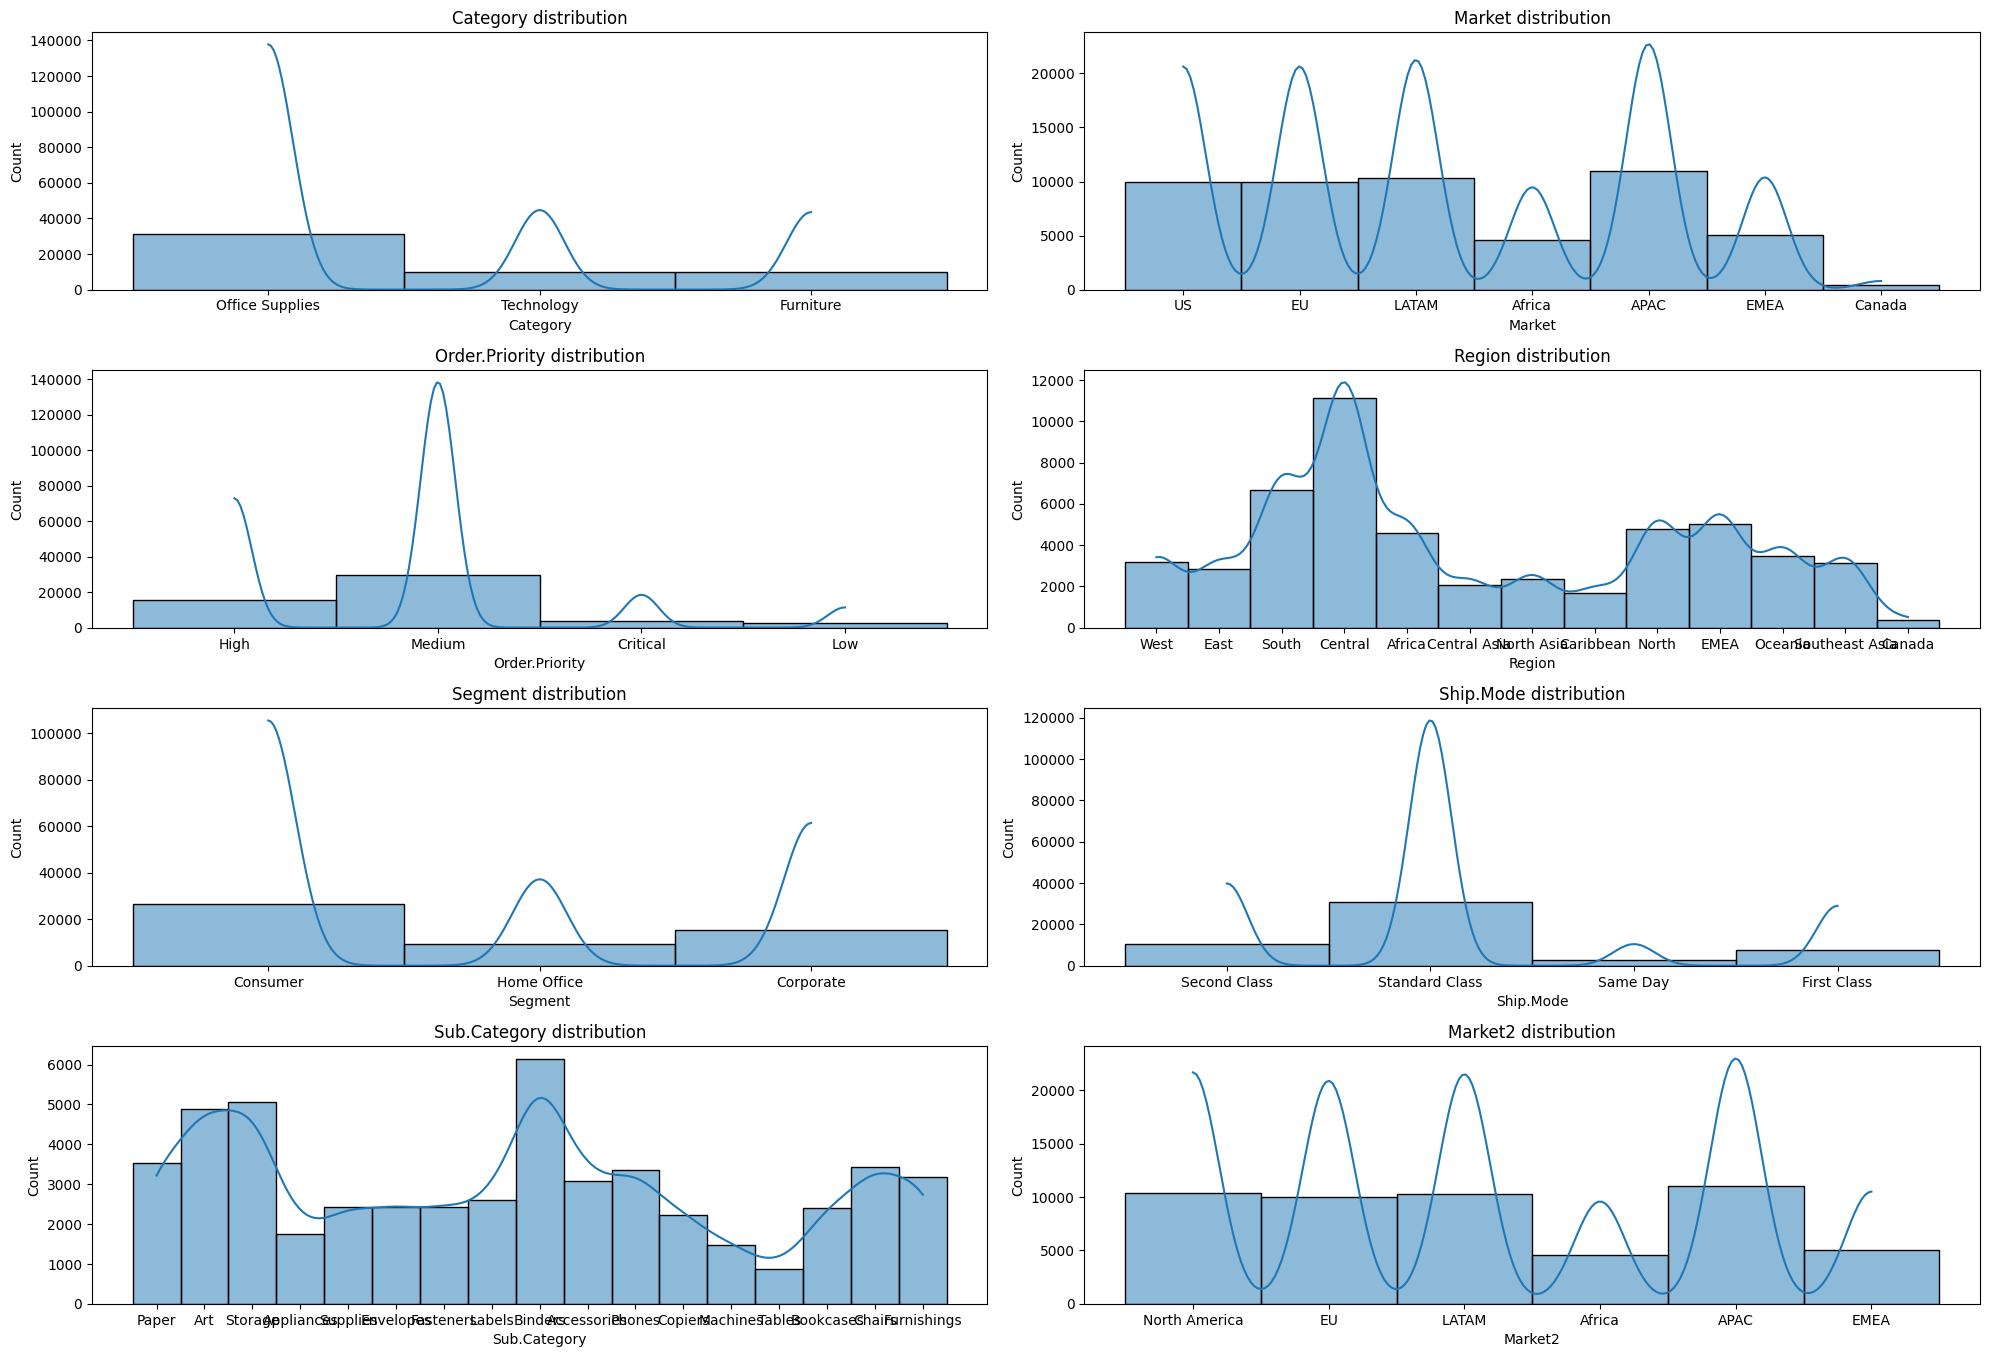

In [19]:
exp_cols = ['Category','Market','Order.Priority','Region','Segment','Ship.Mode','Sub.Category','Market2']
plt.figure(figsize=(20,20))
for i, column in enumerate(exp_cols):
    plt.subplot(6,2, i+1)
    sns.histplot(data=df, x=column, kde=True, bins=30)
    plt.title(f'{column} distribution')
    plt.tight_layout()

# Checking for outliers

## Using Z-Score
The Z-score method measures how many standard deviations a data point is from the mean. Typically, values beyond a certain threshold (often 2 or 3 standard deviations) are considered outliers.

In [21]:
z_scores = stats.zscore(df['Profit'])
threshold = 3
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
outliers = df['Profit'].iloc[outlier_indices]
print("Outliers:", outliers)

Outliers: 803       654.7554
1137      626.1850
1742      792.2691
1757     1270.9900
1866      582.2320
           ...    
50987     944.9865
51076     944.9865
51097    1049.9850
51116    1007.9832
51278     884.0580
Name: Profit, Length: 865, dtype: float64


## Plotting the graph to see outliers

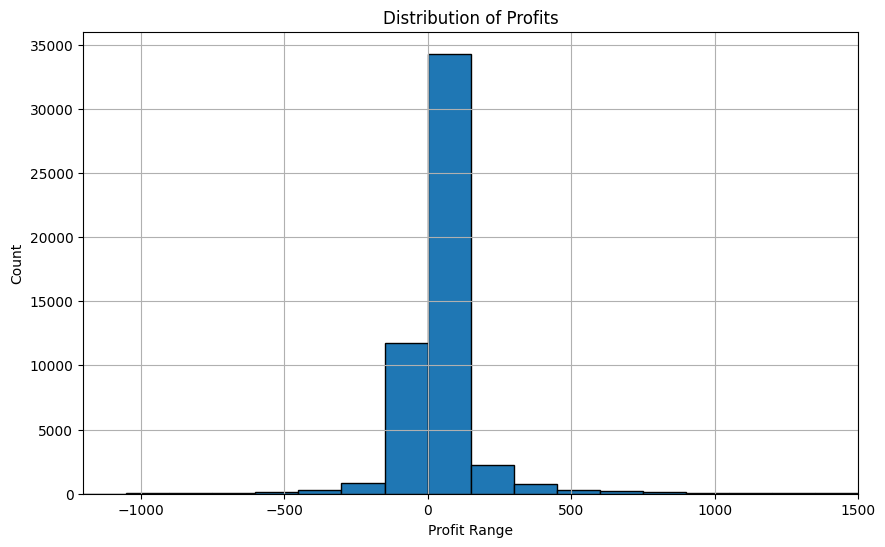

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(df['Profit'], bins=100, edgecolor='black')
plt.xlabel('Profit Range')
plt.ylabel('Count')
plt.title('Distribution of Profits')
plt.xlim(-1200,1500)

plt.grid(True)
plt.show()

In [32]:
df["Profit"].describe()

count    51290.000000
mean        28.610982
std        174.340972
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.976000
Name: Profit, dtype: float64

In [36]:
def determine_outlier_thresholds_std(dataframe, col_name):
    upper_boundary = dataframe[col_name].mean() + 3 * dataframe[col_name].std()
    lower_boundary = dataframe[col_name].mean() - 3 * dataframe[col_name].std()
    return lower_boundary, upper_boundary

determine_outlier_thresholds_std(df, 'Profit')

(-494.4119332224227, 551.6338981777747)

In [40]:
def check_outliers_std(dataframe, col_name):
    lower_boundary, upper_boundary = determine_outlier_thresholds_std(dataframe, col_name)
    if dataframe[(dataframe[col_name] > upper_boundary) | (dataframe[col_name] < lower_boundary)].any(axis=None):
        return True
    else: 
        return False

def replace_with_thresholds_std(dataframe, cols, replace=False):
    from tabulate import tabulate
    data = []
    for col_name in cols:
        if col_name != 'Outcome':
            outliers_ = check_outliers_std(dataframe, col_name)
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_std(dataframe, col_name)
            if outliers_:
                count = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)][col_name].count()
                if replace:
                        dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
            outliers_status = check_outliers_std(dataframe, col_name)
            data.append([outliers_, outliers_status,count, col_name, lower_limit, upper_limit])
    table = tabulate(data, headers=['Outlier (Previously)','Outliers','Count', 'Column','Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using 3 Standard Deviation")
    print(table)

replace_with_thresholds_std(df, ['Profit'],replace=False)

Removing Outliers using 3 Standard Deviation
======================  ==========  =======  ========  =============  =============
Outlier (Previously)    Outliers      Count  Column      Lower Limit    Upper Limit
======================  ==========  =======  ========  =============  =============
True                    True            865  Profit         -494.412        551.634
======================  ==========  =======  ========  =============  =============


/tmp/ipykernel_42/1040079061.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > upper_boundary) | (dataframe[col_name] < lower_boundary)].any(axis=None):
/tmp/ipykernel_42/1040079061.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > upper_boundary) | (dataframe[col_name] < lower_boundary)].any(axis=None):
